In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

File path: C:/Users/annal/Downloads/FirstLAserDotSUBTRACTED.png
Format: PNG
Size: (1024, 1024)
Mode: I;16
Image array shape: (1024, 1024)
0
1586
782.6943740844727


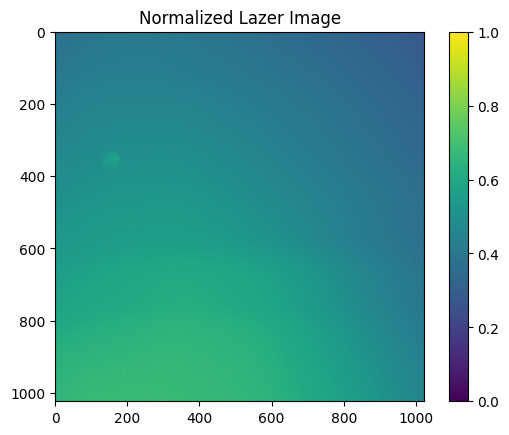

In [82]:
#import image
def read_png_file(file_path):
    """Read a PNG file and return it as a numpy array."""
    try:
        # Open the image file
        with Image.open(file_path) as img:
            # Convert the image to a numpy array
            img_array = np.array(img)
            
            # Display basic information about the image
            print("File path:", file_path)
            print("Format:", img.format)
            print("Size:", img.size)
            print("Mode:", img.mode)

            return img_array

    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None
    except IOError:
        print("Error occurred while trying to read the file.")
        return None

# Replace with your PNG file path
file_path = "C:/Users/annal/Downloads/FirstLAserDotSUBTRACTED.png"
img_array = read_png_file(file_path)
if img_array is not None:
    print("Image array shape:", img_array.shape)

#normalize and plot logarithmically
normalized_array = (img_array - img_array.min()) / (img_array.max() - img_array.min())
plt.imshow(normalized_array)
plt.colorbar()
plt.title('Normalized Lazer Image')

print(img_array.min())
print(img_array.max())
print(img_array.mean())

In [77]:
#apply 2d fourier transform
'apply 2D fourier transform on array'
def fourierTransform2D(aperture, plot):
    transform = np.fft.fft2(aperture)
    transform_shifted = np.fft.fftshift(transform)
    transform_magnitude = np.abs(transform_shifted)
    if plot:
        plt.imshow(np.log(1 + transform_magnitude))
        plt.colorbar()
        plt.title('Spatial Fourier Transform')
        plt.show()
    return transform_shifted

'apply 2D inverse fourier transform on a centered array'
def inverseTransform2D(transform, plot):
    shifted = np.fft.ifftshift(transform)
    spatial_image = np.fft.ifft2(shifted)
    if plot:
        plt.imshow(np.abs(spatial_image))
        plt.colorbar
        plt.title('Inverse Fourier Transform')
        plt.show()
    return spatial_image

'apply 2D frequency filtering on a centered transform'
def frequencyFilter(transform, filter, plot):
    filtered = np.multiply(filter,transform)
    if plot:
        plt.imshow(np.log(np.abs(1 + filtered)))
        plt.colorbar()
        plt.title('Filtered Fourier Transform')
        plt.show()
    return filtered

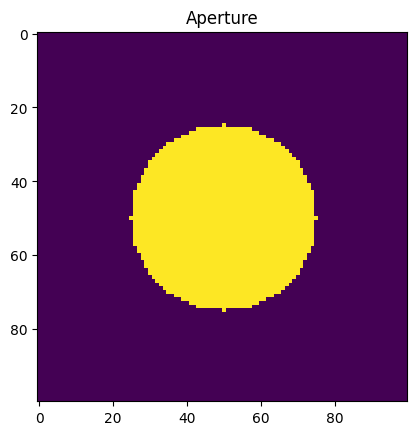

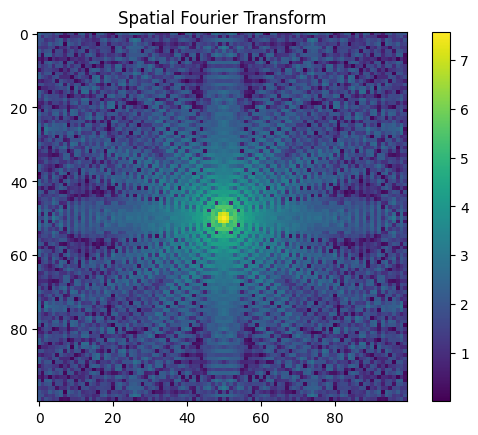

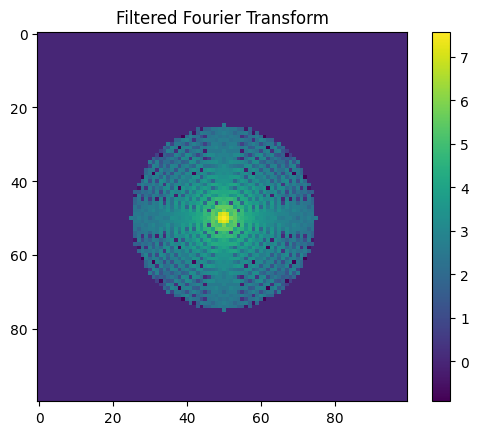

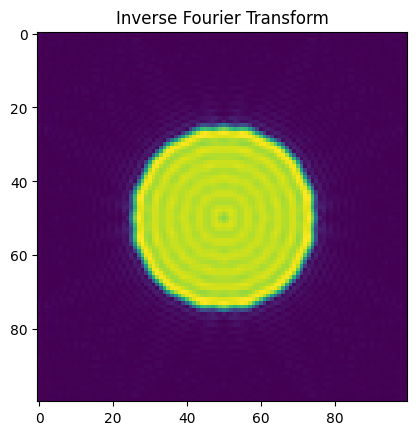

In [81]:
#test functions
size = 100
radius = 25
array = np.zeros((size, size), dtype=int)
center = size // 2

for i in range(size):
    for j in range(size):
        if (i - center) ** 2 + (j - center) ** 2 <= radius ** 2:
            array[i, j] = 1

filter = array

plt.imshow(array)
plt.title('Aperture')
plt.show()
transform = fourierTransform2D(array, 1)
filtered = frequencyFilter(transform, filter, 1)
image = inverseTransform2D(filtered, 1)